In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
wal=pd.read_csv(r'C:\Users\DELL 5110\Walmart_Sales.csv')
print(wal.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [7]:
# Sample dataset
data = {
    'Store': [1, 1, 1, 1, 1],
    'Date': ['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010', '05-03-2010'],
    'Weekly_Sales': [1643690.90, 1641957.44, 1611968.17, 1409727.59, 1554806.68],
    'Holiday_Flag': [0, 1, 0, 0, 0],
    'Temperature': [42.31, 38.51, 39.93, 46.63, 46.50],
    'Fuel_Price': [2.572, 2.548, 2.514, 2.561, 2.625]
}


In [9]:
# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
# EDA: Visualize the relationships
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Weekly Sales ($)')

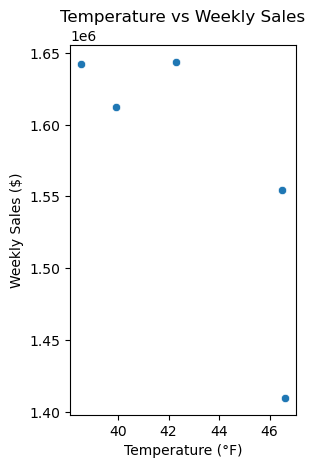

In [11]:
# Scatter plot for Temperature vs Weekly Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')

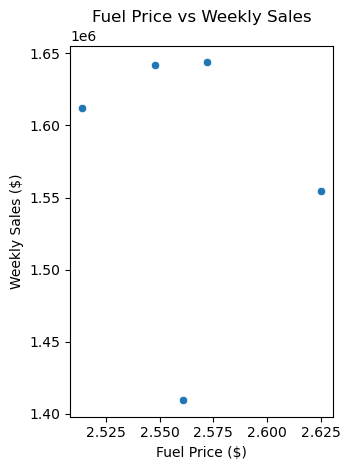

In [13]:
# Scatter plot for Fuel Price vs Weekly Sales
plt.subplot(1, 2, 2)
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title('Fuel Price vs Weekly Sales')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales ($)')

plt.tight_layout()
plt.show()

In [15]:
# Correlation Analysis
correlation = df[['Weekly_Sales', 'Temperature', 'Fuel_Price']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
              Weekly_Sales  Temperature  Fuel_Price
Weekly_Sales      1.000000    -0.780777   -0.196220
Temperature      -0.780777     1.000000    0.702293
Fuel_Price       -0.196220     0.702293    1.000000


In [17]:
# Prepare data for regression
X = df[['Temperature', 'Fuel_Price']]
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

C:\Users\DELL 5110\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [23]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 14137345943.129898
R^2 Score: nan


In [25]:
# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:")
print(coefficients)


Coefficients:
              Coefficient
Temperature -4.712673e+04
Fuel_Price   2.274681e+06


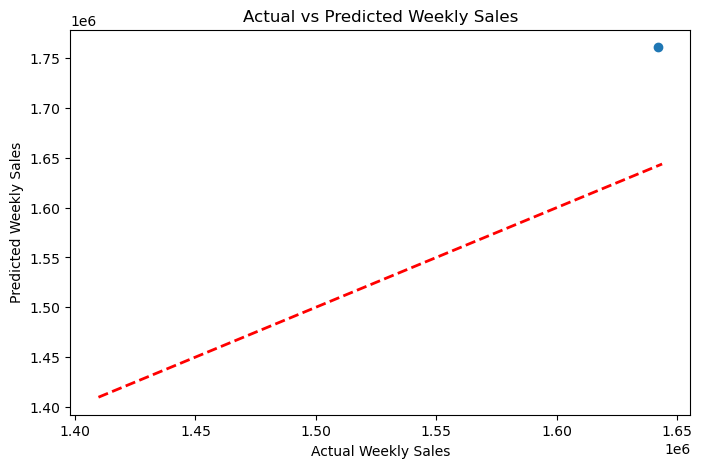

In [27]:
# Visualize the predictions vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales')
plt.show()
